In [18]:
import src
from src.messystacks import utils


import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import copy
import pandas as pd
import numpy as np

S = 4
M = 40
N_AGENTS = 1000

In [19]:
params_dict = {
    "s": [S-1, S, S+1],
    "n": [None],
    "p": list(np.arange(0, 1.01, 0.01)),
    "m": [M-20, M, M+20],
    "n_agents": [N_AGENTS],
    "avg_util": [None],
    "n_ticks": [12*60],
    "lending_ticks": [20],
    "save_mode": ["one_line"],
    "dict_get_mode": [],
    "dict_return_mode": [],
    "scenario" : [],
    }
df_params = pd.concat([
    utils.create_df_params(utils.add_1_strategy(params_dict, "random")), 
    utils.create_df_params(utils.add_1_strategy(params_dict, "max")),
    utils.create_df_params(utils.add_1_strategy(params_dict, "weighted_max")),
    ]).reset_index(drop=True)

# run experiment
df_experiment = utils.run_experiment(df_params, reps = 4, n_cores = 4)
df_experiment.to_csv(str(src.PATH) + "/data/output/experiment1.csv", index=False)

KeyboardInterrupt: 

In [ ]:
df_experiment = pd.read_csv(str(src.PATH) + "/data/output/experiment1.csv")
g = sns.FacetGrid(df_experiment, col="m", row = "s", hue="scenario")
g.map(sns.lineplot, "p", "max_prop_disorder", color="black")
g.map(sns.scatterplot, "p", "prop_disorder", alpha=0.25)
g.map(sns.lineplot, "p", "prop_disorder", ci=None)
# plt.legend()

### Experiment 2a: demand -> disorder

In [18]:
params_dict = {
    "s": [S],
    "n": [None],
    "p": [0.2, 0.5, 0.8],
    "m": [M],
    "n_agents": [None],
    "avg_util": list(np.arange(0, 1.01, 0.05)),
    "n_ticks": [12*60],
    "lending_ticks": [20],
    "save_mode": ["one_line"],
    "dict_get_mode": [],
    "dict_return_mode": [],
    "scenario" : [],
    }
df_params = pd.concat([
    ms.create_df_params(ms.add_1_strategy(params_dict, "random")), 
    ms.create_df_params(ms.add_1_strategy(params_dict, "max")),
    ms.create_df_params(ms.add_1_strategy(params_dict, "weighted_max")),
    ]).reset_index(drop=True)

# run experiment
df_experiment = ms.run_experiment(df_params, reps = 8, n_cores = 4)
df_experiment.to_csv("output_data/experiment2a.csv", index=False)

<AxesSubplot:xlabel='avg_util', ylabel='prop_disorder'>

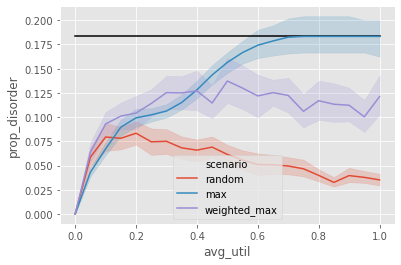

In [28]:
df = pd.read_csv("output_data/experiment2a.csv")
sns.lineplot(x="avg_util", y="max_prop_disorder", data=df, color="black", ci=None)
sns.lineplot(x="avg_util", y="prop_disorder", hue="scenario", data=df)
#plt.legend(False)

### Experiment 2b: demand -> disorder

In [7]:
params_dict = {
    "s": [S],
    "n": [None],
    "p": [0.25, 0.5, 0.75],
    "m": [20, 40, 60],
    "n_agents": [None],
    "avg_util": list(np.arange(0, 1.01, 0.05)),
    "n_ticks": [12*60],
    "lending_ticks": [20],
    "save_mode": ["one_line"],
    "dict_get_mode": [],
    "dict_return_mode": [],
    "scenario" : [],
    }
df_params = pd.concat([
    ms.create_df_params(ms.add_1_strategy(params_dict, "random")), 
    ms.create_df_params(ms.add_1_strategy(params_dict, "max")),
    ms.create_df_params(ms.add_1_strategy(params_dict, "weighted_max")),
    ]).reset_index(drop=True)

# run experiment
df_experiment = ms.run_experiment(df_params, reps = 4, n_cores = 4)
df_experiment.to_csv("output_data/experiment1b.csv", index=False)

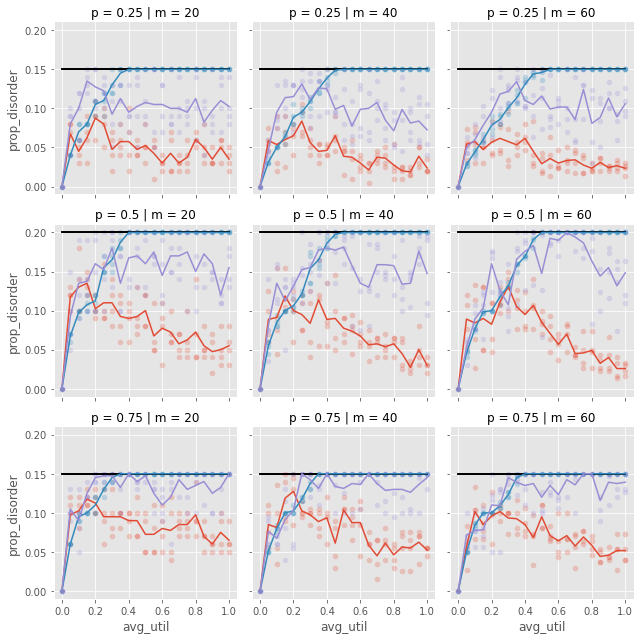

In [8]:
df_experiment = pd.read_csv("output_data/experiment1b.csv")
g = sns.FacetGrid(df_experiment, col="m", row = "p", hue="scenario")
g.map(sns.lineplot, "avg_util", "max_prop_disorder", color="black")
g.map(sns.scatterplot, "avg_util", "prop_disorder", alpha=0.25)
g.map(sns.lineplot, "avg_util", "prop_disorder", ci=None)
# plt.legend()

### Experiment 1c: fill level (p) -> disorder (control: avg_util)

- fill level variieren, aber average utilization konstant halten

In [14]:
params_dict = {
    "s": [4],
    "n": [None],
    "p": list(np.arange(0, 1.01, 0.05)),
    "m": [50],
    "n_agents": [None],
    "avg_util": [0.1, 0.3, 0.5, 0.7, 0.9],
    "n_ticks": [12*60],
    "lending_ticks": [20],
    "save_mode": ["one_line"],
    "dict_get_mode": [],
    "dict_return_mode": [],
    "scenario" : [],
    }
df_params = pd.concat([
    ms.create_df_params(ms.add_1_strategy(params_dict, "random")), 
    ms.create_df_params(ms.add_1_strategy(params_dict, "max")),
    ms.create_df_params(ms.add_1_strategy(params_dict, "weighted_max")),
    ]).reset_index(drop=True)

# run experiment
df_experiment = ms.run_experiment(df_params, reps = 8, n_cores = 4)
df_experiment.to_csv("output_data/experiment1c.csv", index=False)

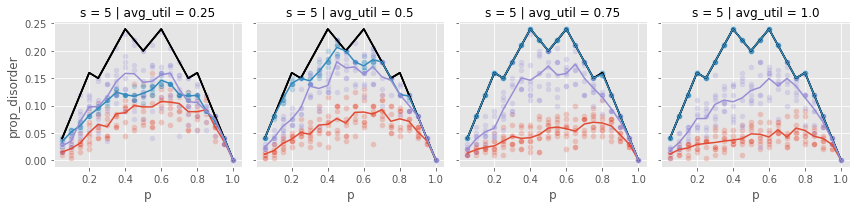

In [15]:
df_experiment = pd.read_csv("output_data/experiment1c.csv")
g = sns.FacetGrid(df_experiment, col="avg_util", row = "s", hue="scenario")
g.map(sns.lineplot, "p", "max_prop_disorder", color="black")
g.map(sns.scatterplot, "p", "prop_disorder", alpha=0.25)
g.map(sns.lineplot, "p", "prop_disorder", ci=None)
# plt.legend()

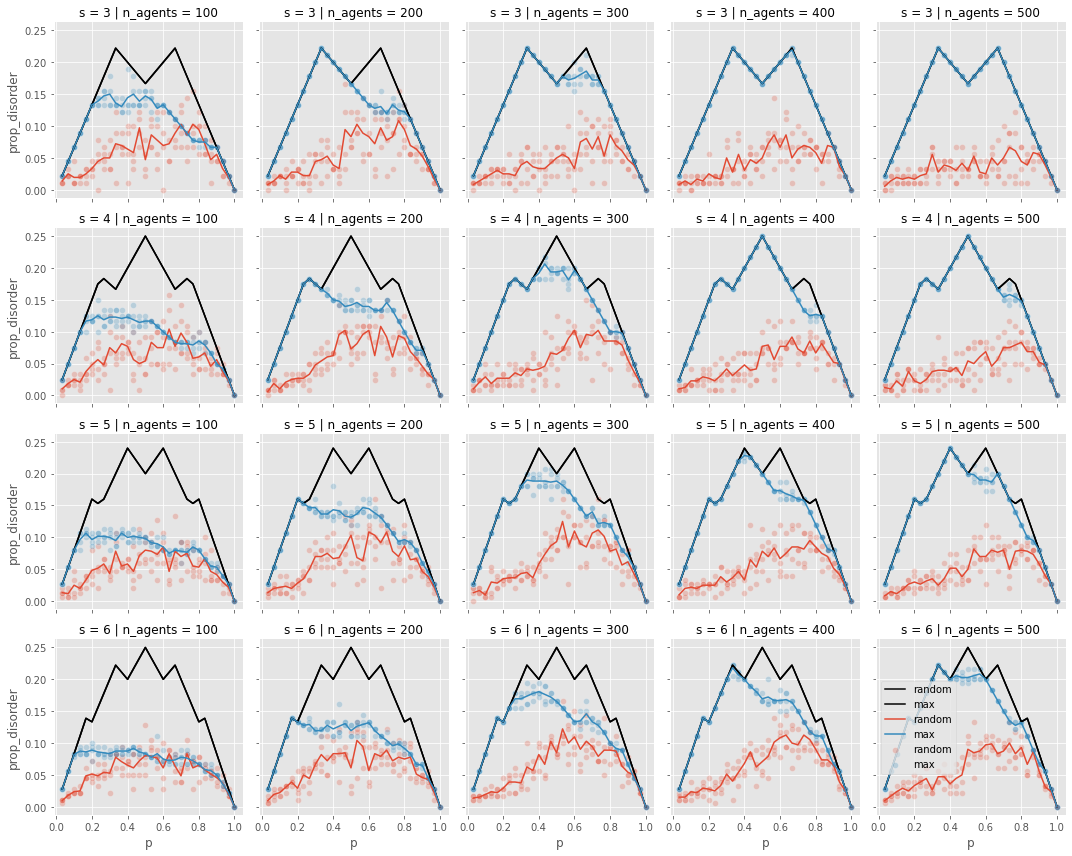

In [40]:
df_experiment_1 = pd.read_csv("output_data/experiment1.csv")
g = sns.FacetGrid(df_experiment_1, col="n_agents", row = "s", hue="scenario")
g.map(sns.lineplot, "p", "max_prop_disorder", color="black")
g.map(sns.scatterplot, "p", "prop_disorder", alpha=0.25)
g.map(sns.lineplot, "p", "prop_disorder", ci=None)
plt.legend()

## Experiment 2

In [2]:
params_dict_2 = {
    "s": [3,4,5,6],
    "n": [5, 15, 25],
    "m": [30],
    "n_agents": list(range(0, 1501, 50)),
    "n_ticks": [10],
    "lending_ticks": [1],
    "dict_get_mode": [],
    "dict_return_mode": [],
    "save_mode": ["one_line"],
    "scenario" : [],
    }

df_params_2 = pd.concat([
    ms.create_df_params(ms.add_1_strategy(params_dict_2, "random")), 
    ms.create_df_params(ms.add_1_strategy(params_dict_2, "max")),
    ms.create_df_params(ms.add_1_strategy(params_dict_2, "weighted_max")),
    ]).reset_index(drop=True)

In [3]:
# run experiment
df_experiment_2 = ms.run_experiment(df_params_2, reps = 4, n_cores = 4)
df_experiment_2.to_csv("output_data/experiment2.csv", index=False)

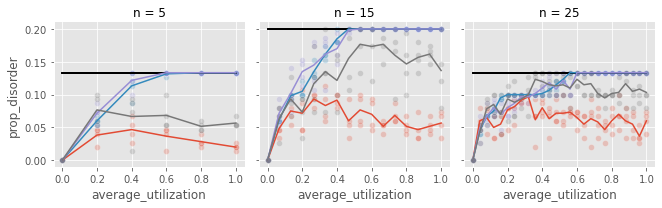

In [9]:
df_experiment_2 = pd.read_csv("output_data/experiment2.csv")
df = df_experiment_2[df_experiment_2.average_utilization <= 1]
g = sns.FacetGrid(df, col="n", hue="scenario", col_wrap=5)
g.map(sns.lineplot, "average_utilization", "max_prop_disorder", color="black")
g.map(sns.scatterplot, "average_utilization", "prop_disorder", alpha=0.25)
g.map(sns.lineplot, "average_utilization", "prop_disorder", ci=None)
# plt.legend()